# cross-section results
after applying the correction for $\phi_\mu \sim 0$ and $\phi_p \sim 0$

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/'

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


# apply the efficiency weights - if they were not computed yet

In [8]:
if ("Pmu weight" not in selected_beam_on.columns): # or -1!=0
    
    print 'no Pmu weights, computing them'
    compute_eff_weights(   beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat) 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pmu weights and saving the files.'
else:
     print 'Pmu weights already exist'

no Pmu weights, computing them
saved  12127 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_off.csv
done assiging Pmu weights and saving the files.


In [9]:
if ("Pp weight" not in selected_beam_on.columns): #  or -1!=0
    
    print 'no Pp weights, computing them'
    compute_eff_weights(   beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat
                        ,ob_1='Pp',ob_2='cos(theta(p))',ob_3='phi(p)'                       
                        ,reco_1='reco_Pp',reco_2='reco_Pp_cos_theta',reco_3='reco_Pp_phi'                       
                        ,true_1='truth_Pp',true_2='truth_Pp_cos_theta',true_3='truth_Pp_phi') 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pp weights and saving the files.'
else:
     print 'Pp weights already exist'

no Pp weights, computing them
saved  12127 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_off.csv
done assiging Pp weights and saving the files.


## Draw the cross-sections

In [6]:
afro_genie_CC1p_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
for gname in genie_list: 
    csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
    if os.path.isfile( csvfilename ):#{
        afro_genie_CC1p_dict[gname] = pd.read_csv(csvfilename)
        print 'loaded',len(afro_genie_CC1p_dict[gname]),'afro GENIE CC1p '+gname+' events'
    #}
    else: #{
        afro_genie = pd.read_csv( path + 'CC_4_9E20_POT_mA_0_99'+'_'+gname+'.csv')
        print 'loaded',gname
        afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                            & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                            & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                            & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                           ]
        afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                       ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                       ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
        print len(afro_genie_CC1p),'afro GENIE CC1p'
        afro_genie_CC1p_in_cuts = afro_genie_CC1p[(np.abs(afro_genie_CC1p['theta_12']-90)<delta_theta_12)
                                                  &(afro_genie_CC1p['Pt']<Pt_max)
                                                  &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]
        print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
        csvfilename = Paths['selected events'] + 'afro_genie_CC1p_' + gname + '.csv'
        afro_genie_CC1p_in_cuts.to_csv(csvfilename)
        print 'saved ',len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p '+gname+' events to',csvfilename    
        afro_genie_CC1p_dict[gname] = afro_genie_CC1p_in_cuts    
    #}
print 'done loading afro GENIE files'

loaded 25833 afro GENIE CC1p nominal events
loaded 25918 afro GENIE CC1p hA2015 events
loaded 23167 afro GENIE CC1p hA_SRC events
loaded 27348 afro GENIE CC1p hA_Tune3 events
done loading afro GENIE files


In [7]:
for particle in ['mu','p']:
    genie_Xsec_dicts = dict()
    for iXsec,(remove_ctu_bin,Xsec_title,Xsec_name) in enumerate(zip(remove_ctu_bools,Xsec_ctu_titles,Xsec_fnames)):
        do_absolute_Xsec = True
        genie_Xsec_dicts[Xsec_title] = dict()
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']):
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)        
            mul = 180./np.pi if 'phi' in observable else 1

            for gname,ls,glabel in zip(genie_list,['-','--','-.',':'],genie_labels):#{
                genie_model_CC1p = afro_genie_CC1p_dict[gname]  
                if remove_ctu_bin: #{
                    genie_model_CC1p = genie_model_CC1p[genie_model_CC1p['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
                #}
                if do_absolute_Xsec:#{
                    genie_model_Xsec,genie_model_Xsec_err = compute_Xsec(Non=len(genie_model_CC1p), Non_err=np.sqrt(len(genie_model_CC1p)))                
                    genie_Xsec_dicts[Xsec_title][gname+' Xsec'] = genie_model_Xsec*4.908e19/4.9e20
                    genie_Xsec_dicts[Xsec_title][gname+' Xsec err'] = genie_model_Xsec_err*4.908e19/4.9e20
                    do_absolute_Xsec = False
                #}
                h_genie,_ = np.histogram(mul*genie_model_CC1p[vtrue],bins=bins)
                h_genie_err = np.sqrt(h_genie)
                genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
                for i_bin in range(len(bins)-1):#{
                    genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20, 
                                                                           Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,                
                                                                           eff=1, bin_width=bin_width[i_bin] )
                #}
                genie_Xsec_dicts[Xsec_title][gname+' '+observable] = genie_Xsec
                genie_Xsec_dicts[Xsec_title][gname+' '+observable+' err'] = genie_Xsec_err
            #}
        #}
        print 'done',Xsec_title
    outfilename = Paths['1d Xsec'] + "P"+particle + "_genie_Xsecs_1D.txt"
    with open(outfilename, 'w') as outfile:#{
        outfile.write(pickle.dumps(genie_Xsec_dicts))
    #}    
    print 'done',particle,'saved into \n',outfilename
print 'done.'

done excluding the last $\cos\theta_\mu$ bin
done with the last $\cos\theta_\mu$ bin
done mu saved into 
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/Pmu_genie_Xsecs_1D.txt
done excluding the last $\cos\theta_\mu$ bin
done with the last $\cos\theta_\mu$ bin
done p saved into 
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/Pp_genie_Xsecs_1D.txt
done.


In [10]:
def draw_Xsecs(do_add_afro_genie = True, do_corr_phi_0=False, debug=0, particle='mu',
               do_P=True, do_cos_theta=True, do_phi=True,figsize=(24,8)):

    Xsec_with_last_cos_theta_mu_bin = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug, particle=particle,
                                                do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,                                                                      
                                                selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                                
                                                selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)
    Xsec_without_last_cos_theta_mu_bin = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug, particle=particle,
                                                   do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,
                                                  remove_last_cos_theta_mu_bin=True,                                                 
                                                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                                                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p)
    genie_Xsecs = dict()
    Sigmas_Summary = dict()
    figurename = 'Xsec_1D_P'+particle 
    for iXsec,(Xsec_dict,do_cos_theta,Xsec_title,Xsec_name) in enumerate(zip([Xsec_with_last_cos_theta_mu_bin,Xsec_without_last_cos_theta_mu_bin]                                                   
                                                                  ,[True,False]
                                                                  ,[r'with the last $\cos\theta_\mu$ bin',r'excluding the last $\cos\theta_\mu$ bin']
                                                                  ,['with_last_Pmu_cos_theta_bin','without_last_Pmu_cos_theta_bin'])):
        fig=plt.figure(figsize=figsize)
        for i,(observable,ivar,do_var) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']                                                        
                                                                 ,[(1,4),(2,5),(3,6)]
                                                                 ,[do_P,do_cos_theta,do_phi])):
            if do_var==False: continue
            if debug: print observable
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            mul = 180./np.pi if 'phi' in observable else 1
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_dict[observable],Xsec_dict[observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = Xsec_dict['mc '+observable], Xsec_dict['mc '+observable+' err']

            ax = fig.add_subplot(3,3,ivar)
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay') 
            if do_add_afro_genie:#{
                for gname,ls,glabel in zip(genie_list,['-','--','-.',':'],genie_labels):#{
                    afro_genie_CC1p = afro_genie_CC1p_dict[gname]  
                    if iXsec==1: afro_genie_CC1p = afro_genie_CC1p[afro_genie_CC1p['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
                    if i==0:#{
                        afro_Xsec,afro_Xsec_err = compute_Xsec(Non=len(afro_genie_CC1p), Non_err=np.sqrt(len(afro_genie_CC1p)))
                        genie_Xsecs[gname] = afro_Xsec*4.908e19/4.9e20
                        genie_Xsecs[gname+' err'] = afro_Xsec_err*4.908e19/4.9e20
                    #}
                    h_genie,_ = np.histogram(mul*afro_genie_CC1p[vtrue],bins=bins)
                    h_genie_err = np.sqrt(h_genie)
                    genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
                    for i_bin in range(len(bins)-1):
                        genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin]*4.908e19/4.9e20, Non_err=h_genie_err[i_bin]*4.908e19/4.9e20,
                                                                               eff=1, bin_width=bin_width[i_bin] )
                    mystep(x=mid ,x_width=bin_width, y=genie_Xsec, y_width=genie_Xsec_err,
                           color='black',linestyle=ls,linewidth=3,label=glabel)
                #}
            #}
            set_axes(ax,'',y_label=get_Xsec_label(vlabel=vlabel,units=units)
                         ,do_add_grid=True,remove_ticks_x=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                         ,ylim=(0,1.1*np.max(ax.get_ylim()))
                        )
            plt.title(Xsec_title, y=1.02,fontsize=25)
                    
            # depict a line simboling the removal of the last cos(theta) bin
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')

            # residuals plot
            den, den_err = h['Xsec']-h['mc Xsec'],np.sqrt(np.square(h['Xsec err'])+np.square(h['mc Xsec err']))
            num, num_err = h['Xsec'],h['mc Xsec err']
            ratio = den/num
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            chi2,ndf = chi2_two_data_curves(h1=h['Xsec'],h1err=h['Xsec err'],h2=h['mc Xsec'],h2err=h['mc Xsec err'],bins=bins,debug=0)
            set_axes(ax,xlabel,y_label=r'(data-MC)/data',do_add_grid=True)
            plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')
            plt.title(r'$\chi^2/ndf=%.2f/%d$'%(chi2,ndf), fontsize=20,y=0.80)

            # depict a line simboling the removal of the last cos(theta) bin
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')
                    
            # add text in the middle ax: the integrated cross sections
            Sigmas = [Xsec_dict['integrated Xsec'],Xsec_dict['mc Xsec'],genie_Xsecs['nominal'],genie_Xsecs['hA2015'],genie_Xsecs['hA_SRC'],genie_Xsecs['hA_Tune3']]
            Sigmas_err = [Xsec_dict['integrated Xsec err'],Xsec_dict['mc Xsec err'],genie_Xsecs['nominal err'],genie_Xsecs['hA2015 err'],genie_Xsecs['hA_SRC err'],genie_Xsecs['hA_Tune3 err']]
            Sigmas_Summary[Xsec_name] = (Sigmas,Sigmas_err)
                
            Slabels = ['','overlay','GENIE(nominal)','GENIE(hA2015)','GENIE(SRC+hA)','GENIE(Tune3+hA)']
            Scolors = [Colors['beam on'],Colors['CC1p'],'black','black','black','black']
                 
            if iXsec==1:
                for jXsec,jax,jtitle,jXsec_name in zip([0,1],[2,8],
                                                           [r'excluding the last $\cos\theta_\mu$ bin',r'with last the $\cos\theta_\mu$ bin'],
                                                           ['without_last_Pmu_cos_theta_bin','with_last_Pmu_cos_theta_bin']):
                    Sigmas,Sigmas_err = Sigmas_Summary[jXsec_name]
                    ax=fig.add_subplot(3,3,jax)
                    for iSigma,(Sigma,Sigma_err,label,color) in enumerate(zip(Sigmas,Sigmas_err,Slabels,Scolors)):
                        plt.text(0.01,0.85-0.15*iSigma
                                     ,r'$\sigma_{'+label+r'} =(%.2f \pm %.2f)$%s'%(Sigma,Sigma_err,get_Xsec_label())
                                     ,color=color,fontsize=20)
                    set_axes(ax,'',ticks_color='white',title=jtitle)

        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)
        save_figure(figures_path + figurename + '_' + Xsec_name + '.pdf')
    return Xsec_with_last_cos_theta_mu_bin,Xsec_without_last_cos_theta_mu_bin

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pmu_with_last_Pmu_cos_theta_bin.pdf


/usr/local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pmu_without_last_Pmu_cos_theta_bin.pdf


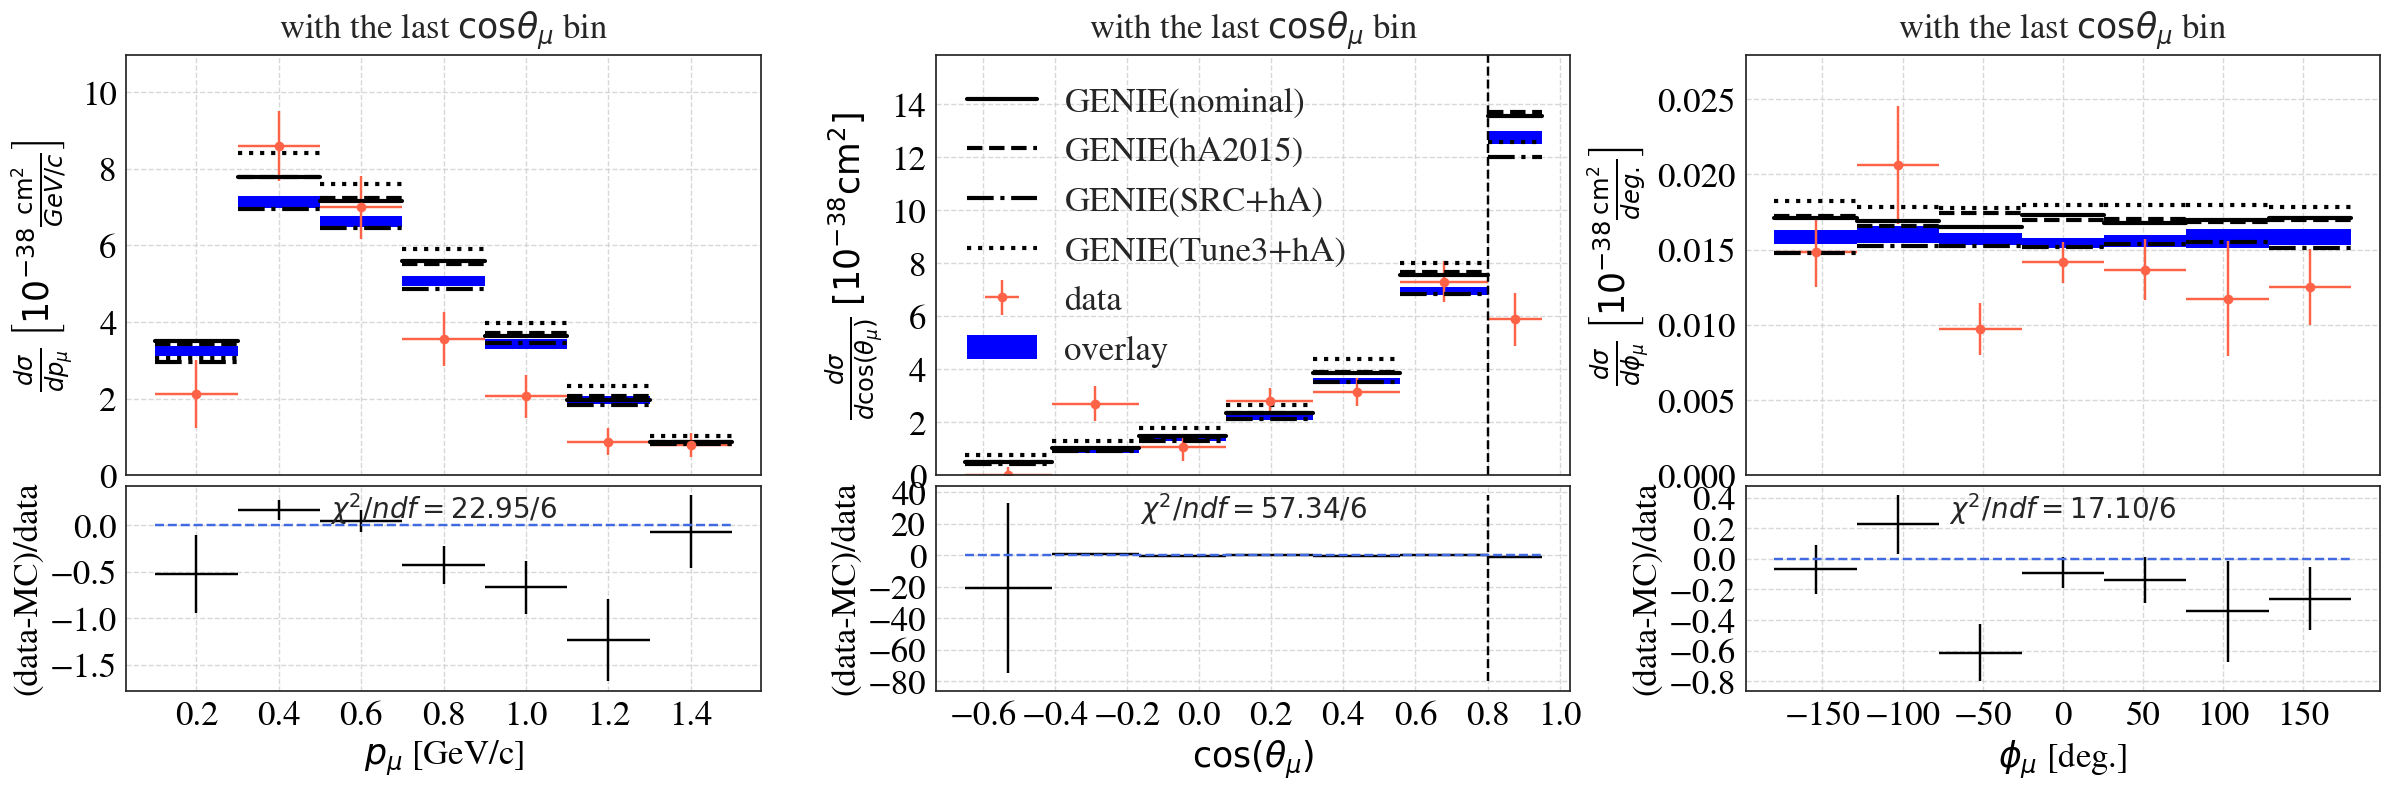

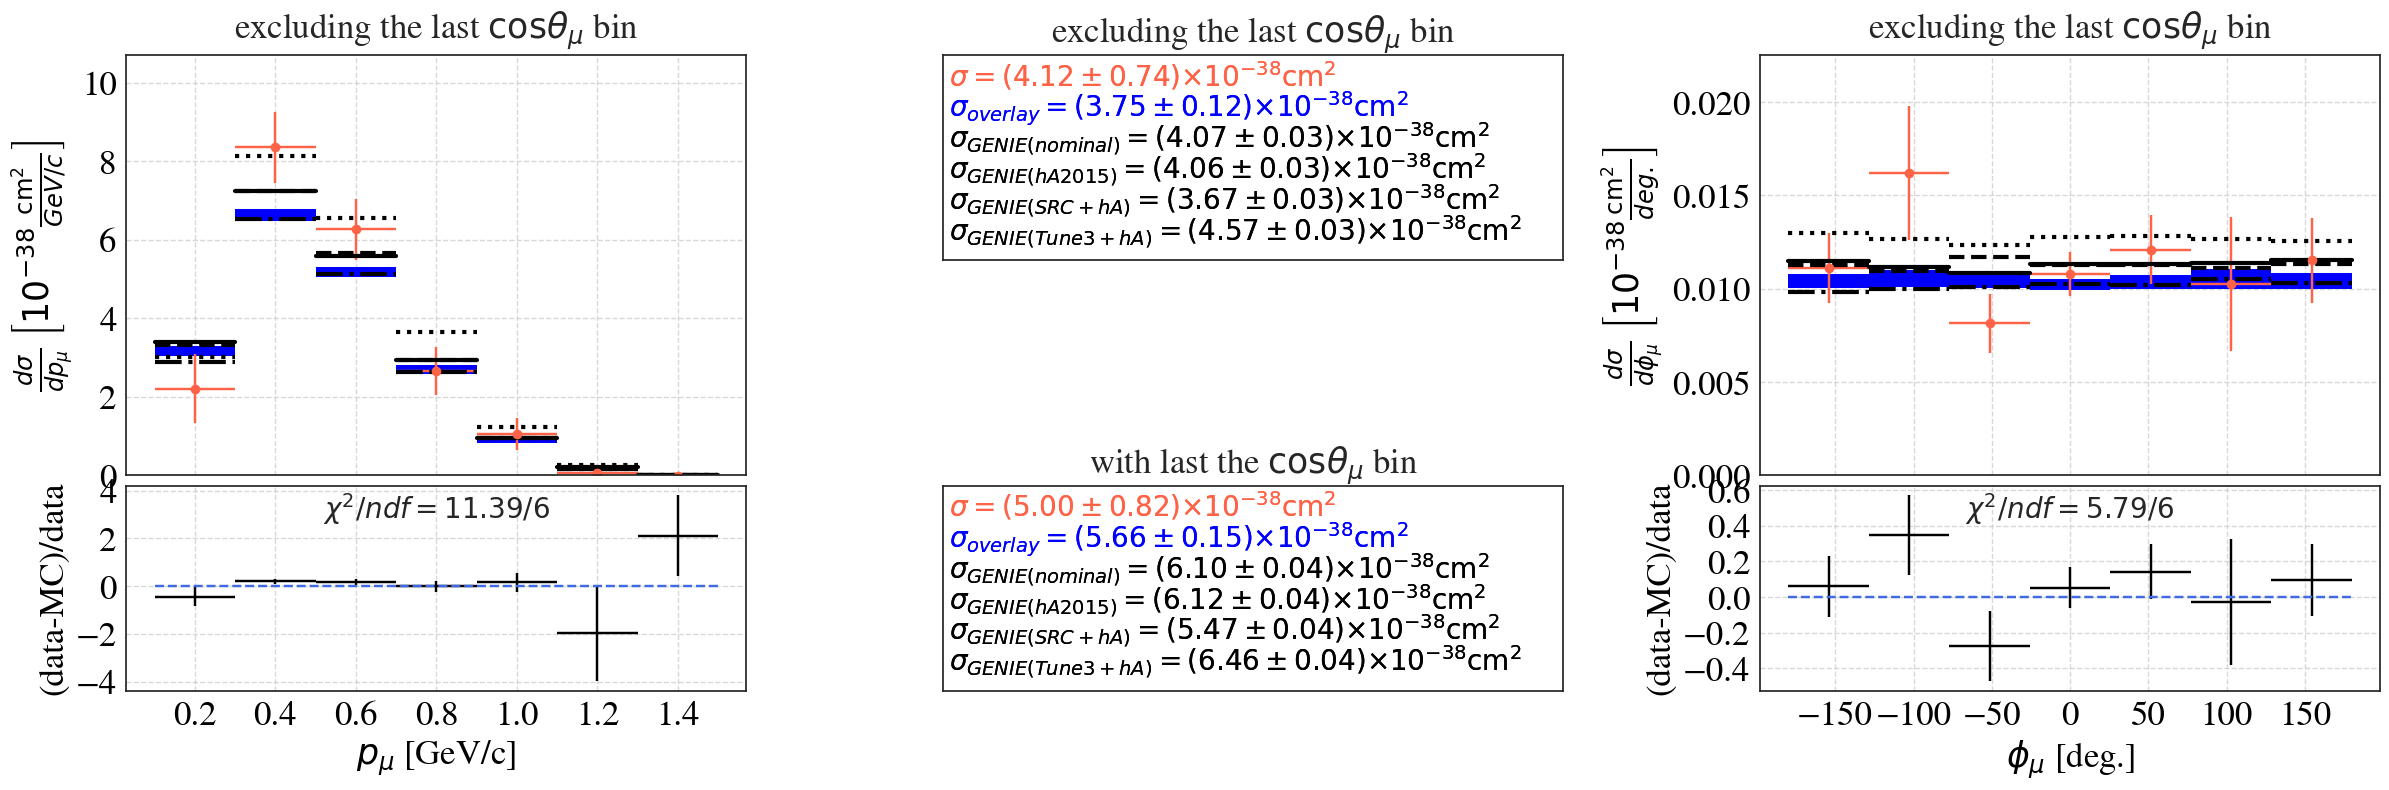

In [11]:
draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='mu',do_P=True,do_phi=True,figsize=(24,8));

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pp_with_last_Pmu_cos_theta_bin.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_results/Xsec_1D_Pp_without_last_Pmu_cos_theta_bin.pdf


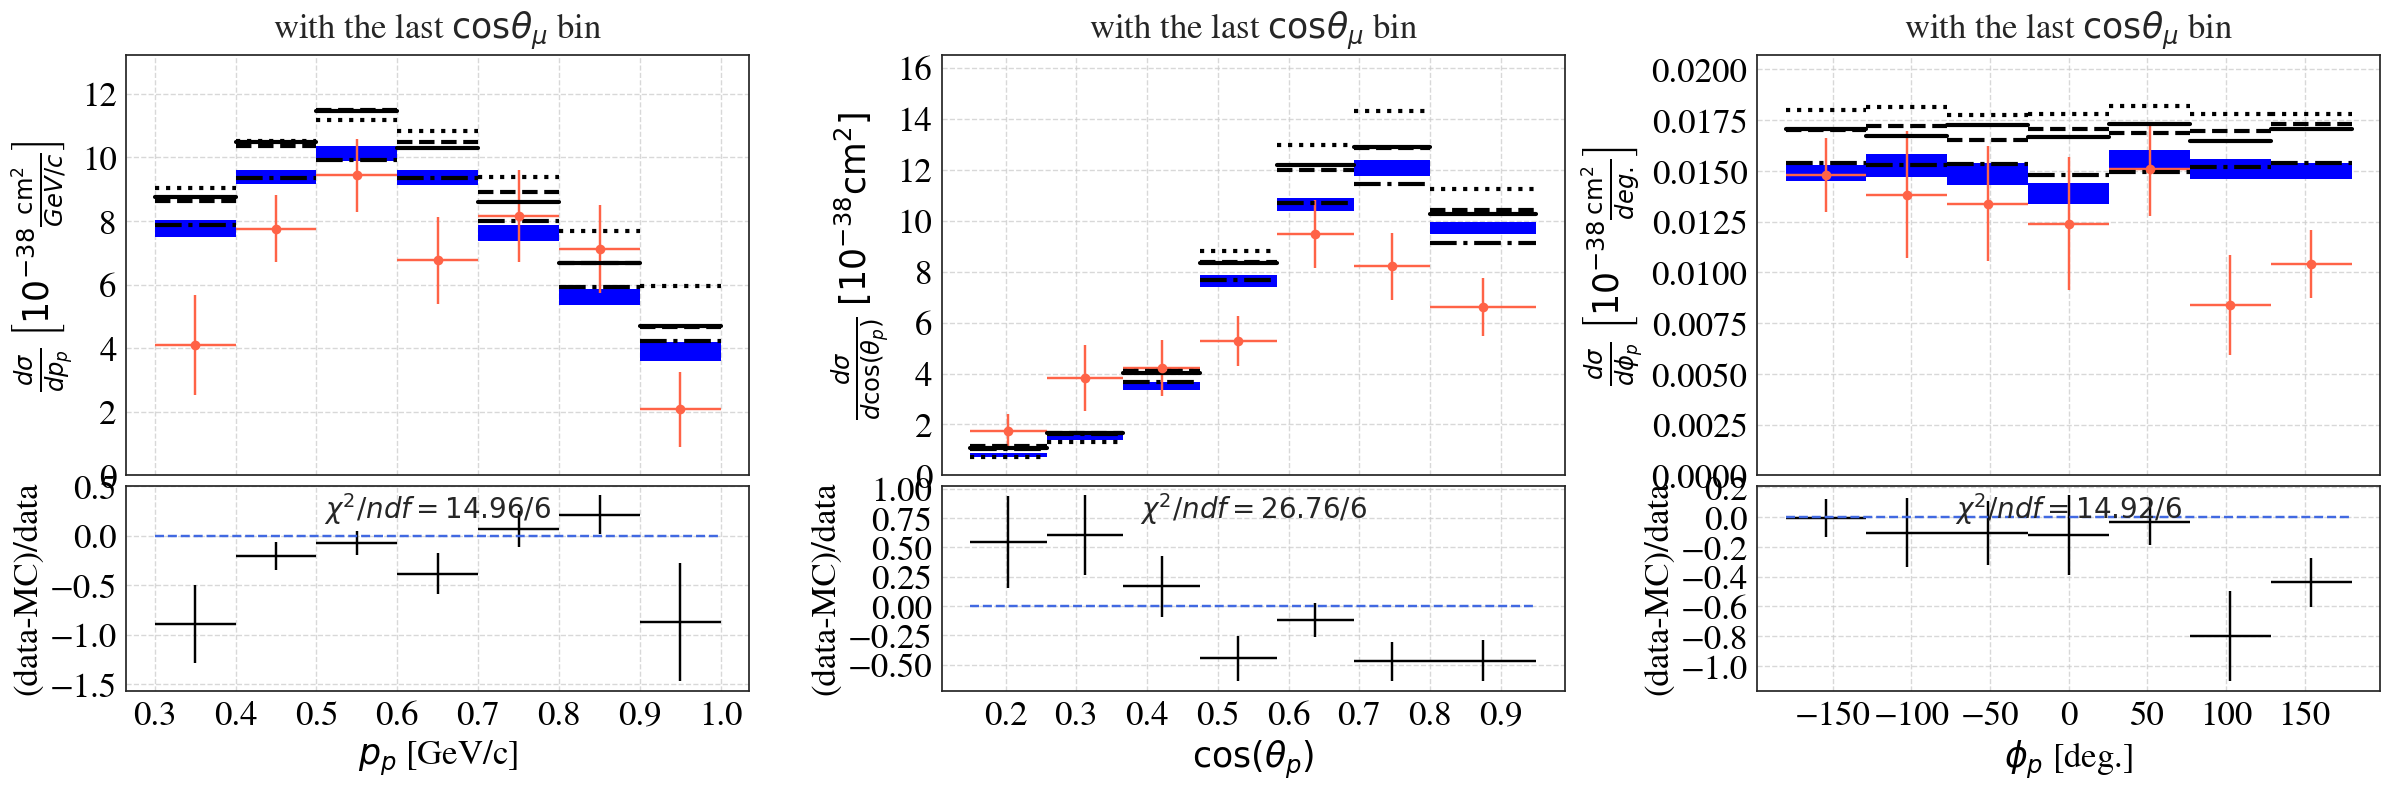

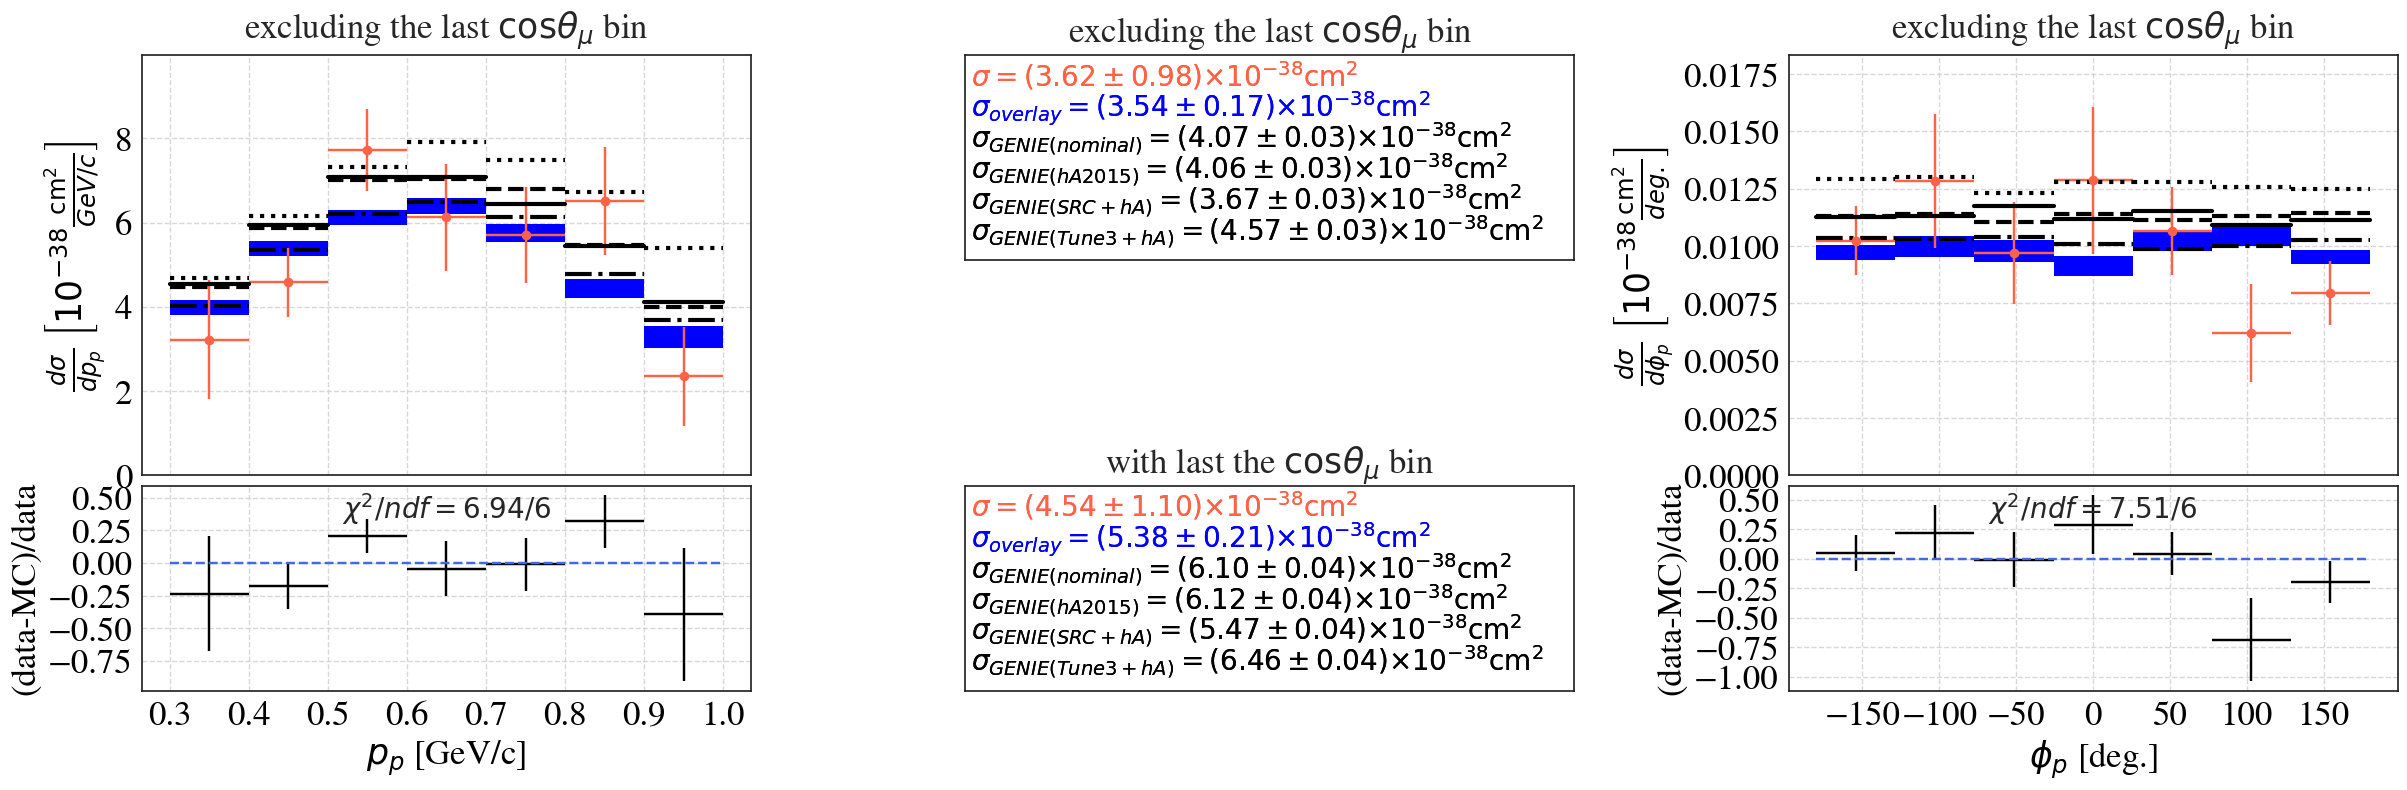

In [12]:
draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='p',do_P=True,do_phi=True);

# cross-section as a function of $Q^2$ and $E_\nu$

comparing in bin 0  at 0.0 h1: 4.171899+/-0.968152, h2: 4.875495+/-0.183260
num = 0.495047 den = 0.970902
chi2 this bin: num/den = 0.509883
chi2 : 0.5
comparing in bin 1  at 0.1 h1: 10.627176+/-1.747121, h2: 11.391694+/-0.290838
num = 0.584487 den = 3.137017
chi2 this bin: num/den = 0.186319
chi2 : 0.2
comparing in bin 2  at 0.2 h1: 8.665673+/-1.507967, h2: 8.829275+/-0.269472
num = 0.026765 den = 2.346578
chi2 this bin: num/den = 0.011406
chi2 : 0.0
comparing in bin 3  at 0.3 h1: 7.334592+/-1.359574, h2: 5.782455+/-0.224162
num = 2.409129 den = 1.898690
chi2 this bin: num/den = 1.268838
chi2 : 1.3
comparing in bin 4  at 0.4 h1: 6.148745+/-1.500091, h2: 3.680416+/-0.197471
num = 6.092646 den = 2.289267
chi2 this bin: num/den = 2.661396
chi2 : 2.7
comparing in bin 5  at 0.5 h1: 2.493765+/-0.649892, h2: 1.583027+/-0.112675
num = 0.829444 den = 0.435055
chi2 this bin: num/den = 1.906527
chi2 : 1.9
comparing in bin 6  at 0.6 h1: 0.375715+/-0.348871, h2: 0.774568+/-0.083346
num = 0.159083 d

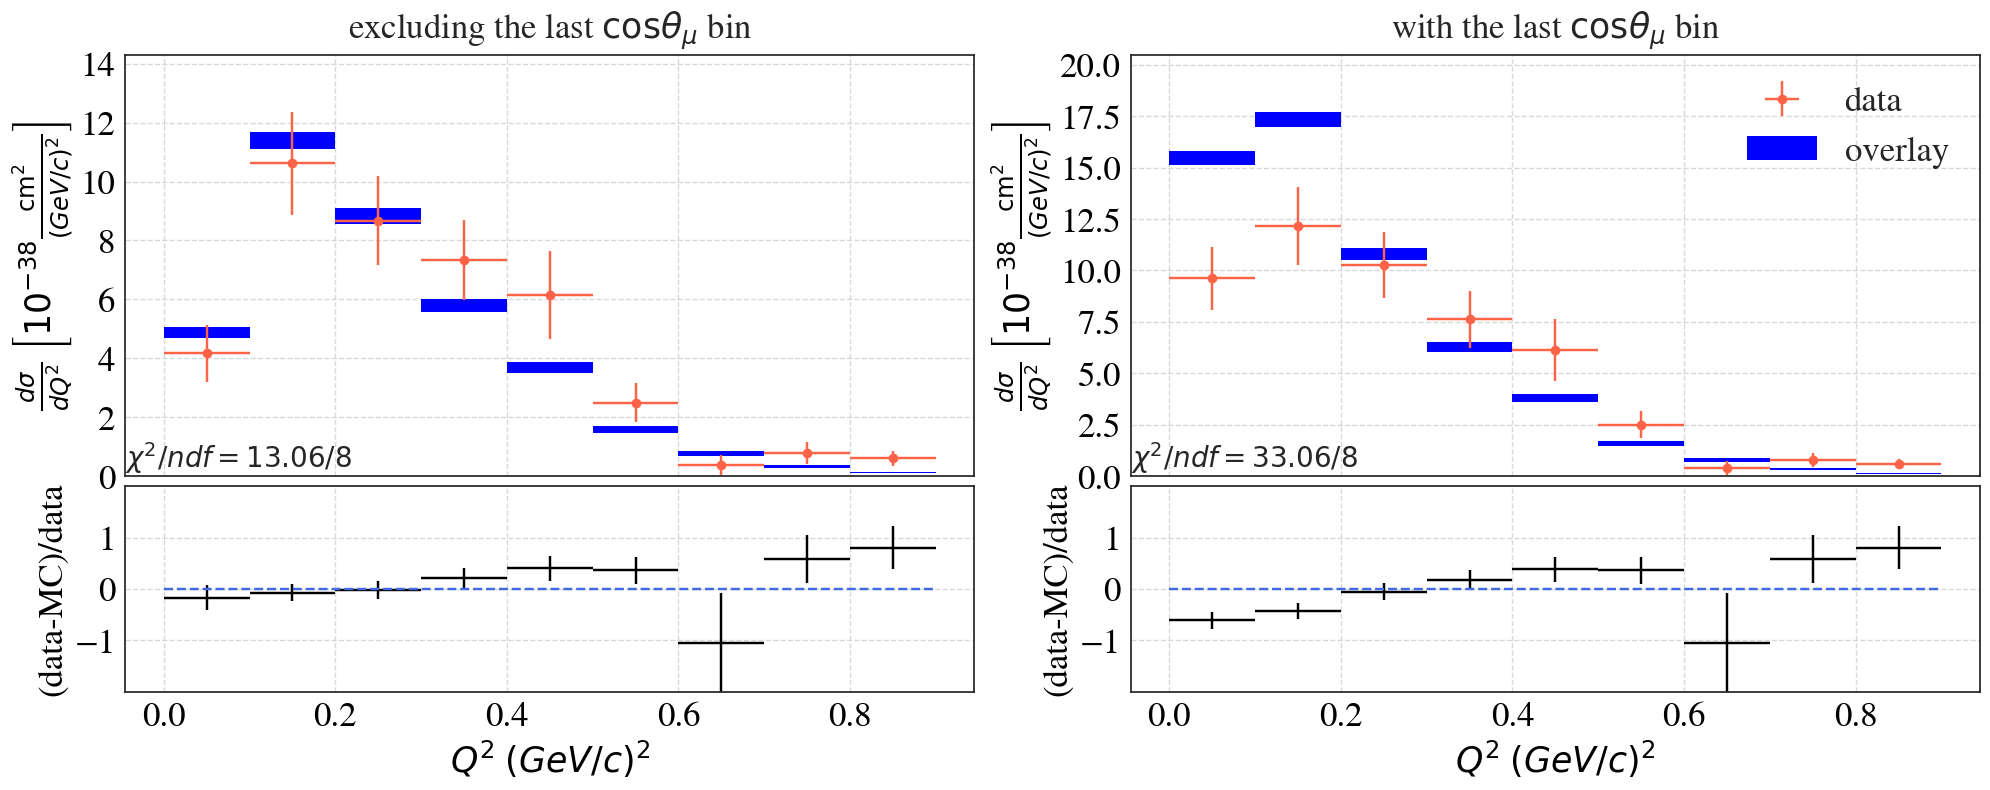

In [15]:
draw_Xsec_variable(var='reco_Q2',bins=linspace(0,0.9,10),vlabel=r'Q^2',units='(GeV/c)^2',figures_path=figures_path,
                      wname='Pmu weight',
                      selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,        
                      selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0,
                   residuals_ylim=[-2,2],residuals_yticks=[-1,0,1],residuals_xtitle='left');

comparing in bin 0  at 0.3 h1: 1.658515+/-1.088596, h2: 2.810543+/-0.159809
num = 1.327167 den = 1.210581
chi2 this bin: num/den = 1.096306
chi2 : 1.1
comparing in bin 1  at 0.39375 h1: 6.045337+/-1.578229, h2: 6.651192+/-0.247591
num = 0.367061 den = 2.552109
chi2 this bin: num/den = 0.143827
chi2 : 0.1
comparing in bin 2  at 0.4875 h1: 11.980343+/-1.790334, h2: 8.599794+/-0.279738
num = 11.428112 den = 3.283549
chi2 this bin: num/den = 3.480415
chi2 : 3.5
comparing in bin 3  at 0.58125 h1: 10.180102+/-1.435835, h2: 7.625516+/-0.248657
num = 6.525910 den = 2.123452
chi2 this bin: num/den = 3.073255
chi2 : 3.1
comparing in bin 4  at 0.675 h1: 6.437946+/-1.224078, h2: 5.904965+/-0.218334
num = 0.284068 den = 1.546038
chi2 this bin: num/den = 0.183739
chi2 : 0.2
comparing in bin 5  at 0.76875 h1: 3.886295+/-0.961033, h2: 4.322274+/-0.188120
num = 0.190078 den = 0.958973
chi2 this bin: num/den = 0.198210
chi2 : 0.2
comparing in bin 6  at 0.8625 h1: 3.100620+/-0.935437, h2: 2.154313+/-0.13

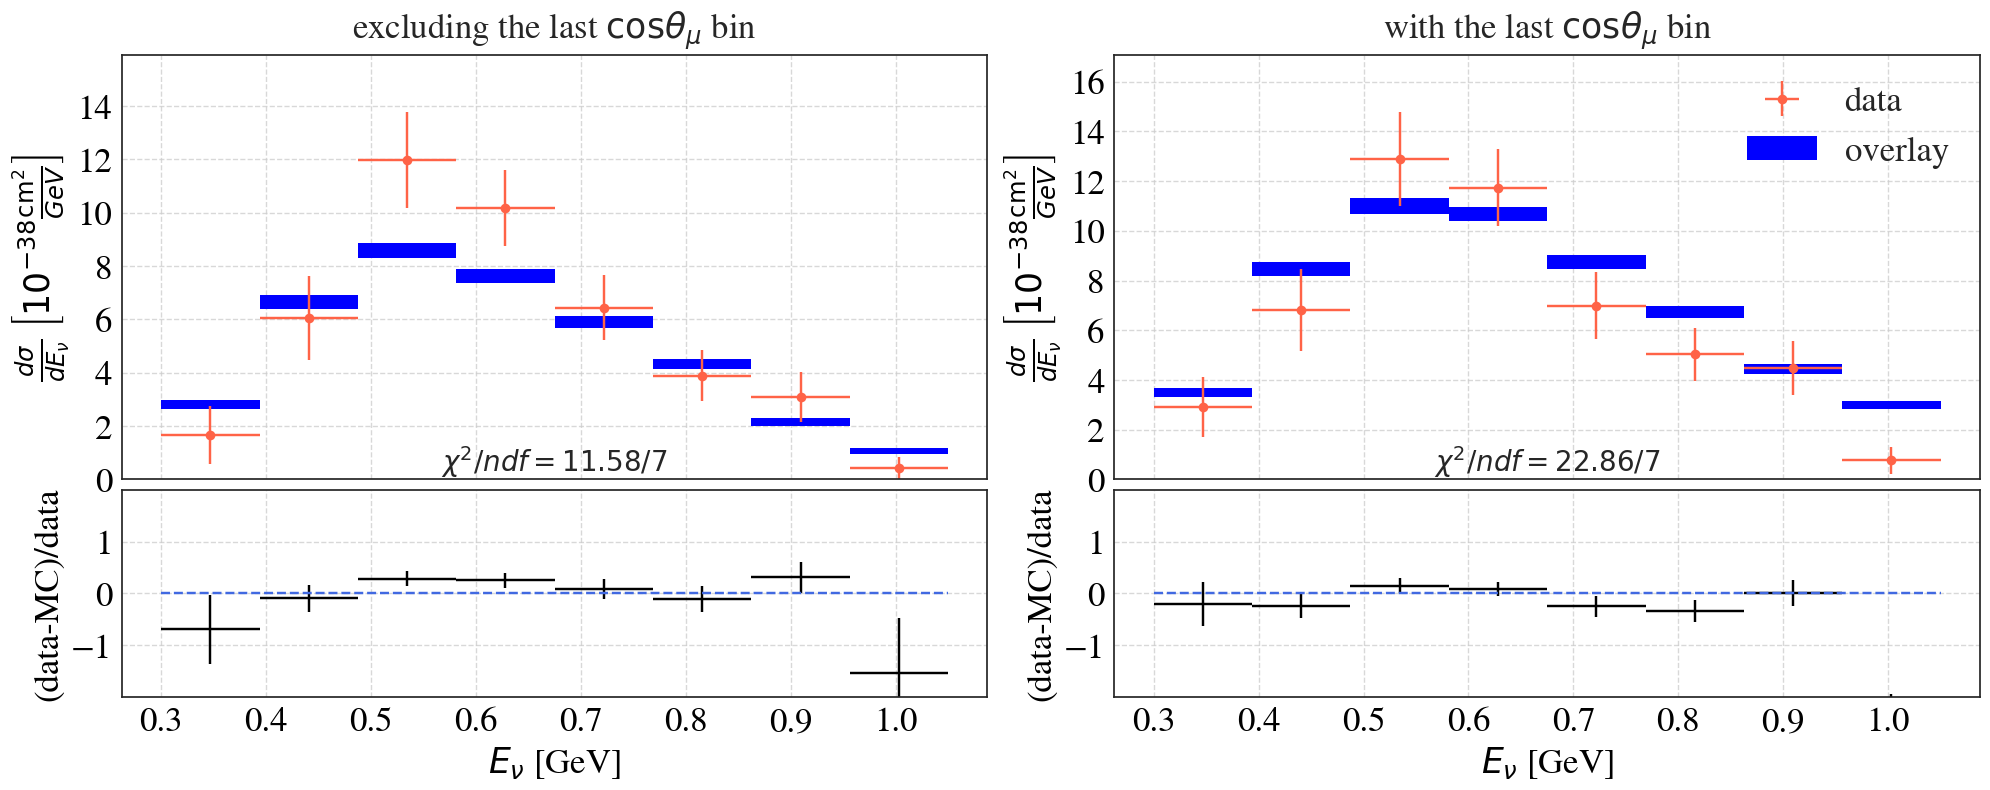

In [16]:
draw_Xsec_variable(var='reco_Ev',bins=linspace(0.3,1.05,9),vlabel=r'E_{\nu}',units='GeV',figures_path=figures_path,
                   wname='Pmu weight',
                   residuals_ylim=[-2,2],residuals_yticks=[-1,0,1],residuals_xtitle='center',
                   selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                           
                   selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,debug=0
                  );